# Data Loading

In [ ]:
# Step 1: Install the library
!pip install opendatasets --quiet

import opendatasets as od
import os
import shutil

# Step 2: Download the dataset
# You will be asked for your Kaggle Username and Key
dataset_url = 'https://www.kaggle.com/datasets/odins0n/hm256x256'
od.download(dataset_url)

# Step 3: Define paths for ONLY the files we need
# (We are ignoring transactions and customers for now)
base_path = './hm256x256'
images_path = os.path.join(base_path, 'images_256_256')
articles_path = os.path.join(base_path, 'articles.csv')

# Step 4: Verification
print("------------------------------------------------")
if os.path.exists(images_path) and os.path.exists(articles_path):
    print("✅ SUCCESS: Dataset loaded!")
    print(f"Images are at: {images_path}")
    print(f"CSV is at: {articles_path}")

    # Check how many images we have (optional)
    num_images = len(os.listdir(images_path))
    print(f"Total Images Found: {num_images}")
else:
    print("❌ ERROR: Something went wrong. Check the folder paths.")
print("------------------------------------------------")

In [2]:
# Free up disk space by deleting unused large files
files_to_delete = [
    'transactions_train.csv',
    'customers.csv',
    'sample_submission.csv'
]

for file in files_to_delete:
    path = os.path.join(base_path, file)
    if os.path.exists(path):
        os.remove(path)
        print(f"Deleted: {file}")

Deleted: transactions_train.csv
Deleted: customers.csv
Deleted: sample_submission.csv


Total Items in CSV: 105542

--- Columns in articles.csv ---
['article_id', 'product_code', 'prod_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code', 'colour_group_name', 'perceived_colour_value_id', 'perceived_colour_value_name', 'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 'department_name', 'index_code', 'index_name', 'index_group_no', 'index_group_name', 'section_no', 'section_name', 'garment_group_no', 'garment_group_name', 'detail_desc']

--- First 3 Rows ---


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.



--- Visualizing Random Samples ---


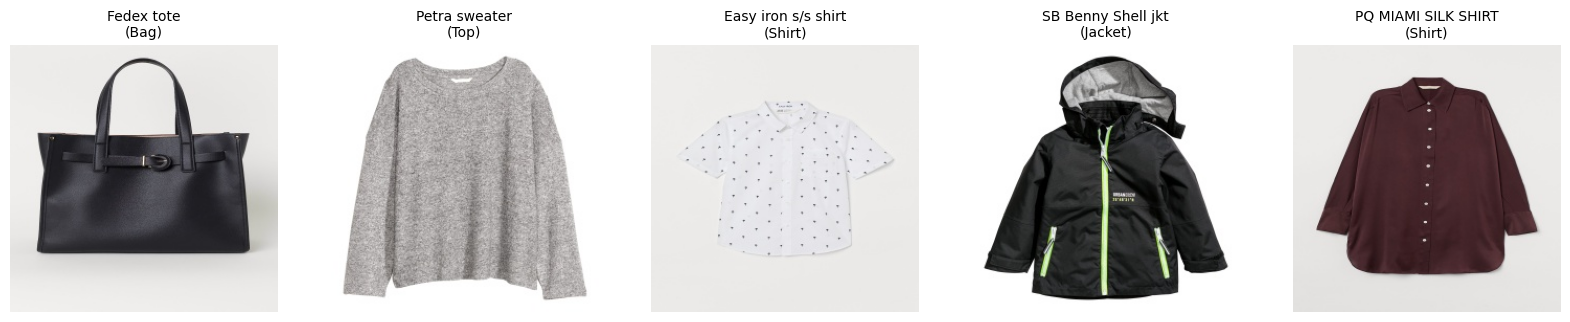

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# 1. Load the CSV
df = pd.read_csv(articles_path)
df['article_id'] = df['article_id'].astype(str) # Convert ID to string immediately

# 2. Fix the ID format (Add leading zeros if missing)
# Example: 108775015 -> 0108775015
df['article_id'] = df['article_id'].apply(lambda x: x.zfill(10))

# 3. Display Data Details
print(f"Total Items in CSV: {len(df)}")
print("\n--- Columns in articles.csv ---")
print(df.columns.tolist())

print("\n--- First 3 Rows ---")
display(df.head(3)) # using display() for pretty printing in Colab

# 4. Helper Function to Find Image Path
def get_image_path(article_id):
    # The images are likely inside subfolders named after the first 3 digits
    # Example: ID 0108775015 is inside folder '010'
    subfolder = article_id[:3]
    path = os.path.join(images_path, subfolder, article_id + ".jpg")
    return path

# 5. Visualize 5 Random Items
print("\n--- Visualizing Random Samples ---")
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
sample_items = df.sample(5)

for i, (idx, row) in enumerate(sample_items.iterrows()):
    img_path = get_image_path(row['article_id'])

    try:
        if os.path.exists(img_path):
            img = mpimg.imread(img_path)
            axes[i].imshow(img)
        else:
            # Fallback if image is missing (common in large datasets)
            axes[i].text(0.5, 0.5, 'Image Not Found', ha='center')

        axes[i].set_title(f"{row['prod_name']}\n({row['product_type_name']})", fontsize=10)
        axes[i].axis('off')
    except Exception as e:
        print(f"Error loading {row['article_id']}: {e}")

plt.show()

In [4]:
import os

def count_all_images(root_dir):
    total_files = 0
    # os.walk goes through every subfolder recursively
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for file in filenames:
            if file.lower().endswith(".jpg"):
                total_files += 1
    return total_files

print("Counting actual images... (This might take a few seconds)")
true_count = count_all_images(images_path)

print(f"------------------------------------------------")
print(f"✅ True Image Count: {true_count}")
print(f"CSV Row Count:      {len(df)}")
print(f"------------------------------------------------")

if true_count > 100000:
    print("Great! You have the full dataset.")
else:
    print("Warning: You might have a partial dataset (or the small version).")

Counting actual images... (This might take a few seconds)
------------------------------------------------
✅ True Image Count: 105100
CSV Row Count:      105542
------------------------------------------------
Great! You have the full dataset.


In [5]:
import pandas as pd
import os

# 1. Check for Missing Values (NaN) in the CSV
print("--- Missing Values Analysis ---")
missing_counts = df.isnull().sum()
# Only show columns that actually have missing values
print(missing_counts[missing_counts > 0])

# 2. Sync: Filter CSV to match available Images
print("\n--- Syncing CSV with Image Folder ---")

# specific columns we care about for the app
critical_cols = ['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'detail_desc']

# Create a set of all valid image IDs (without .jpg extension) for fast lookup
# Logic: Walk through folders, get filenames, strip .jpg
valid_image_ids = set()
for dirpath, dirnames, filenames in os.walk(images_path):
    for file in filenames:
        if file.endswith(".jpg"):
            valid_image_ids.add(file[:-4]) # Remove '.jpg'

print(f"Valid Images found on disk: {len(valid_image_ids)}")

# Filter the DataFrame
# We keep rows where the 'article_id' exists in our 'valid_image_ids' set
initial_count = len(df)
df_clean = df[df['article_id'].isin(valid_image_ids)].copy()
final_count = len(df_clean)

print(f"Original CSV Rows: {initial_count}")
print(f"Cleaned CSV Rows:  {final_count}")
print(f"Dropped Items (No Image): {initial_count - final_count}")

# 3. Handle missing descriptions (Optional but good for UI)
# If 'detail_desc' is missing, fill it with 'No description available'
df_clean['detail_desc'] = df_clean['detail_desc'].fillna('No description available')

print("\n✅ Data is clean and synced!")

--- Missing Values Analysis ---
detail_desc    416
dtype: int64

--- Syncing CSV with Image Folder ---
Valid Images found on disk: 105100
Original CSV Rows: 105542
Cleaned CSV Rows:  105100
Dropped Items (No Image): 442

✅ Data is clean and synced!


In [9]:
import torch
from transformers import CLIPProcessor, CLIPModel
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm.notebook import tqdm
import numpy as np
import os
from google.colab import drive

# --- PART 1: Define the Dataset Class ---
class FashionDataset(Dataset):
    def __init__(self, dataframe, images_folder):
        self.dataframe = dataframe
        self.images_folder = images_folder

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        article_id = row['article_id']
        subfolder = article_id[:3]
        img_path = os.path.join(self.images_folder, subfolder, article_id + ".jpg")

        try:
            image = Image.open(img_path).convert("RGB")
            return image, article_id
        except Exception as e:
            return Image.new('RGB', (256, 256)), article_id

# --- PART 2: Mount Drive & Setup ---
drive.mount('/content/drive', force_remount=True)
save_dir = '/content/drive/MyDrive/fashion_recommender'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# --- PART 3: Load Model ---
print("Loading CLIP Model...")
model_id = "openai/clip-vit-base-patch32"
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CLIPModel.from_pretrained(model_id).to(device)
processor = CLIPProcessor.from_pretrained(model_id)
model.eval()
print(f"✅ Model Loaded on {device.upper()}")

# --- PART 4: The FIX (Custom Collate Function) ---
def custom_collate_fn(batch):
    # This function tells the DataLoader:
    # "Don't merge the images. Just give me a list of images and a list of IDs."
    images = [item[0] for item in batch]
    ids = [item[1] for item in batch]
    return images, ids

# --- PART 5: Execution ---
BATCH_SIZE = 64
if 'df_clean' not in globals():
    raise ValueError("df_clean is missing! Please run the 'Data Cleaning' cell again.")

full_dataset = FashionDataset(df_clean, images_path)

# Notice we added 'collate_fn=custom_collate_fn' here
dataloader = DataLoader(full_dataset, batch_size=BATCH_SIZE, shuffle=False,
                        num_workers=2, collate_fn=custom_collate_fn)

print(f"🚀 STARTING FULL RUN on {len(df_clean)} images...")

all_embeddings = []
all_ids = []

with torch.no_grad():
    for batch_images, batch_ids in tqdm(dataloader):
        # batch_images is now a LIST of PIL images, which processor() loves
        inputs = processor(images=batch_images, return_tensors="pt", padding=True).to(device)

        image_features = model.get_image_features(**inputs)
        image_features = image_features / image_features.norm(p=2, dim=-1, keepdim=True)

        all_embeddings.append(image_features.cpu().numpy())
        all_ids.extend(batch_ids)

print("💾 Saving arrays to Google Drive...")
final_embeddings = np.vstack(all_embeddings)
final_ids = np.array(all_ids)

np.save(f"{save_dir}/embeddings.npy", final_embeddings)
np.save(f"{save_dir}/ids.npy", final_ids)

print("------------------------------------------------")
print("✅ MISSION COMPLETE")
print(f"Saved {final_embeddings.shape[0]} vectors to: {save_dir}")
print("------------------------------------------------")

Mounted at /content/drive
Loading CLIP Model...
✅ Model Loaded on CUDA
🚀 STARTING FULL RUN on 105100 images...


  0%|          | 0/1643 [00:00<?, ?it/s]

💾 Saving arrays to Google Drive...
------------------------------------------------
✅ MISSION COMPLETE
Saved 105100 vectors to: /content/drive/MyDrive/fashion_recommender
------------------------------------------------


Loading vectors from Drive...
Loaded 105100 items.


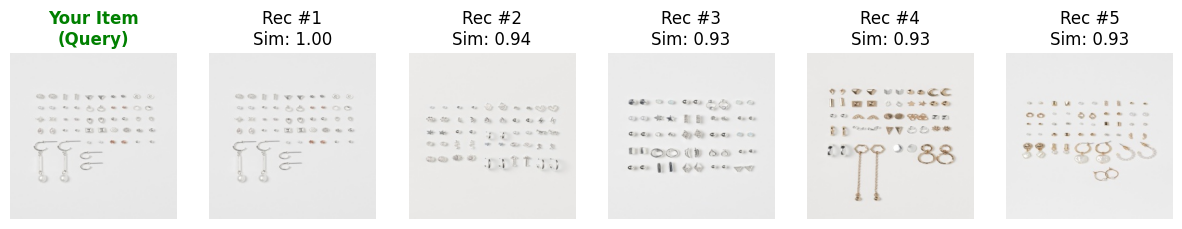

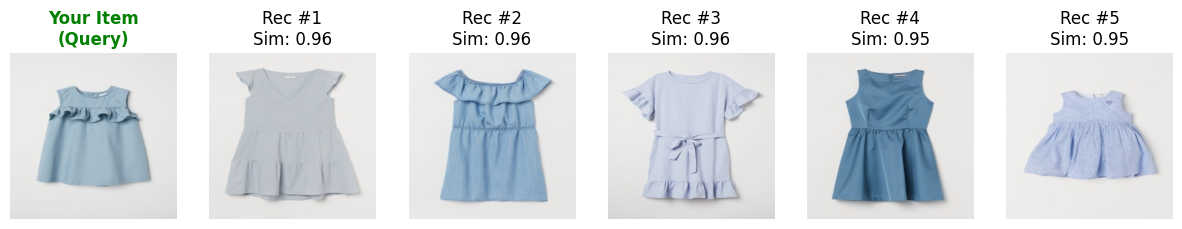

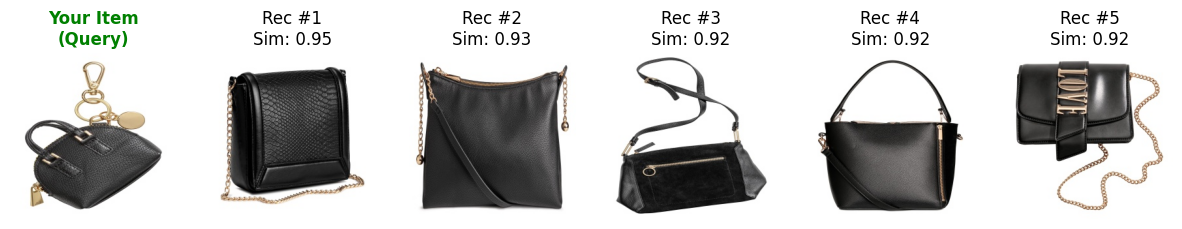

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# 1. Load the "Brain" from Drive
save_dir = '/content/drive/MyDrive/fashion_recommender'
print("Loading vectors from Drive...")
embeddings = np.load(f"{save_dir}/embeddings.npy")
ids = np.load(f"{save_dir}/ids.npy")

print(f"Loaded {embeddings.shape[0]} items.")

# 2. Helper to get image path (Same as before)
def get_path(article_id):
    sub = article_id[:3]
    return os.path.join(images_path, sub, article_id + ".jpg")

# 3. The Recommendation Engine Function
def recommend_products(query_id, top_k=5):
    # A. Find the vector for the input item
    try:
        idx = np.where(ids == query_id)[0][0]
    except IndexError:
        print("Item not found!")
        return

    query_vector = embeddings[idx]

    # B. Calculate Similarity (Dot Product)
    # Since vectors are normalized, Dot Product = Cosine Similarity
    # Shape: (105100,) -> a score for every item
    scores = np.dot(embeddings, query_vector)

    # C. Sort scores (Highest to Lowest)
    # argsort gives indices of sorted values, we take last top_k and reverse them
    top_indices = np.argsort(scores)[-top_k-1:][::-1]

    # D. Visualize
    fig, axes = plt.subplots(1, top_k+1, figsize=(15, 5))

    # Show Query Item
    img = mpimg.imread(get_path(query_id))
    axes[0].imshow(img)
    axes[0].set_title("Your Item\n(Query)", color='green', fontweight='bold')
    axes[0].axis('off')

    # Show Recommendations
    for i, idx in enumerate(top_indices[1:]): # Skip index 0 (itself)
        rec_id = ids[idx]
        score = scores[idx]

        img_path = get_path(rec_id)
        ax = axes[i+1]

        try:
            img = mpimg.imread(img_path)
            ax.imshow(img)
            ax.set_title(f"Rec #{i+1}\nSim: {score:.2f}")
        except:
            ax.text(0.5, 0.5, "Img Missing")

        ax.axis('off')

    plt.show()

# 4. Test with Random Items
# Pick 3 random IDs from our list to test
random_ids = np.random.choice(ids, 3)

for test_id in random_ids:
    recommend_products(test_id)

In [11]:
import zipfile
import numpy as np
import pandas as pd
import os
from google.colab import drive
import shutil

# 1. Setup Paths
drive.mount('/content/drive')
drive_folder = '/content/drive/MyDrive/fashion_recommender'
images_root = './hm256x256/images_256_256'  # Path where images are currently extracted in Colab

# 2. Load the Full "Brain" you just created
print("Loading full data...")
full_embeddings = np.load(f"{drive_folder}/embeddings.npy")
full_ids = np.load(f"{drive_folder}/ids.npy")
# Load CSV to ensure we have metadata
df = pd.read_csv('./hm256x256/articles.csv', dtype={'article_id': str})

# 3. Create a Random Subset (The "Lite" Version)
# We pick 5,000 items. This is enough variety for a demo but small enough (~150MB) to download fast.
subset_size = 5000
total_items = len(full_ids)
# Get random indices
random_indices = np.random.choice(total_items, subset_size, replace=False)

# 4. Slice the Data
print(f"Creating Lite Dataset with {subset_size} items...")
lite_embeddings = full_embeddings[random_indices]
lite_ids = full_ids[random_indices]

# Filter the CSV to match these IDs
lite_df = df[df['article_id'].isin(lite_ids)]

# 5. Create the Zip Package
zip_filename = "fashion_demo_mini.zip"
zip_path = os.path.join(drive_folder, zip_filename)

print(f"Zipping images to {zip_path}...")
print("This might take 2-3 minutes...")

with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # A. Save the Lite NPY files directly into the zip
    np.save("embeddings.npy", lite_embeddings)
    np.save("ids.npy", lite_ids)
    zipf.write("embeddings.npy")
    zipf.write("ids.npy")

    # B. Save the Lite CSV into the zip
    lite_df.to_csv("articles.csv", index=False)
    zipf.write("articles.csv")

    # C. Find and Zip the Images
    count = 0
    for article_id in lite_ids:
        # Reconstruct path: images/010/0108775015.jpg
        subfolder = article_id[:3]
        img_name = article_id + ".jpg"
        src_path = os.path.join(images_root, subfolder, img_name)

        if os.path.exists(src_path):
            # We store them inside an 'images' folder in the zip
            # archive_name looks like: images/010/0108775015.jpg
            zipf.write(src_path, arcname=f"images/{subfolder}/{img_name}")
            count += 1

        if count % 1000 == 0:
            print(f"Packed {count} images...")

# Cleanup temporary files
if os.path.exists("embeddings.npy"): os.remove("embeddings.npy")
if os.path.exists("ids.npy"): os.remove("ids.npy")
if os.path.exists("articles.csv"): os.remove("articles.csv")

print("------------------------------------------------")
print("✅ DONE! The file 'fashion_demo_mini.zip' is in your Google Drive.")
print("It contains:")
print("1. images/ (folder with 5000 photos)")
print("2. articles.csv (metadata for those 5000)")
print("3. embeddings.npy (AI vectors for those 5000)")
print("4. ids.npy (IDs for those 5000)")
print("------------------------------------------------")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading full data...
Creating Lite Dataset with 5000 items...
Zipping images to /content/drive/MyDrive/fashion_recommender/fashion_demo_mini.zip...
This might take 2-3 minutes...
Packed 1000 images...
Packed 2000 images...
Packed 3000 images...
Packed 4000 images...
Packed 5000 images...
------------------------------------------------
✅ DONE! The file 'fashion_demo_mini.zip' is in your Google Drive.
It contains:
1. images/ (folder with 5000 photos)
2. articles.csv (metadata for those 5000)
3. embeddings.npy (AI vectors for those 5000)
4. ids.npy (IDs for those 5000)
------------------------------------------------
